In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import h5py

In [2]:
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
# dataset loaders
train_dataset = h5py.File('dataset/train_signs.h5', mode='r')
test_dataset  = h5py.File('dataset/test_signs.h5', mode='r')

In [4]:
# loading datasets
x_train = np.array(train_dataset['train_set_x'][:], dtype='float')
y_train = np.array(train_dataset['train_set_y'][:], dtype='float')
x_test = np.array(test_dataset['test_set_x'][:], dtype='float')
y_test = np.array(test_dataset['test_set_y'][:], dtype='float')

# reshaping datasets
y_train = y_train.reshape(y_train.shape[0], -1)
y_test  = y_test.reshape(y_test.shape[0], 1)
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [5]:
print('x_train_shape:', x_train.shape)
print('y_train_shape:', y_train.shape)
print('x_test_shape:', x_test.shape)
print('y_test_shape:', y_test.shape)
print('y_train_cat_shape:', y_train_cat.shape)
print('y_test_cat_shape:', y_test_cat.shape)

x_train_shape: (1080, 64, 64, 3)
y_train_shape: (1080, 1)
x_test_shape: (120, 64, 64, 3)
y_test_shape: (120, 1)
y_train_cat_shape: (1080, 6)
y_test_cat_shape: (120, 6)


In [6]:
class CNN_Sign_Recognizer(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        self.L1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3))
        self.L2 = tf.keras.layers.MaxPool2D(strides=(2, 2))
        self.L3 = tf.keras.layers.Conv2D(60, (3, 3), activation='relu')
        self.L4 = tf.keras.layers.MaxPool2D(strides=(2, 2))
        self.L5 = tf.keras.layers.Flatten()
        self.L6 = tf.keras.layers.Dense(450, activation='relu')
        self.L7 = tf.keras.layers.Dense(6, activation='softmax')
        
    def call(self, inputs):
        
        self.x = self.L1(inputs)
        self.x = self.L2(self.x)
        self.x = self.L3(self.x)
        self.x = self.L4(self.x)
        self.x = self.L5(self.x)
        self.x = self.L6(self.x)
        self.x = self.L7(self.x)
        
        return self.x

In [7]:
model = CNN_Sign_Recognizer()

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [9]:
hist = model.fit(x_train, y_train_cat, epochs=20)

Train on 1080 samples
Epoch 1/20
1080/1080 [==============================] - 1s 1ms/sample - loss: 110.1088 - accuracy: 0.2778
Epoch 2/20
1080/1080 [==============================] - 0s 326us/sample - loss: 0.6353 - accuracy: 0.7880
Epoch 3/20
1080/1080 [==============================] - 0s 358us/sample - loss: 0.1414 - accuracy: 0.9583
Epoch 4/20
1080/1080 [==============================] - 0s 327us/sample - loss: 0.0749 - accuracy: 0.9815
Epoch 5/20
1080/1080 [==============================] - 0s 324us/sample - loss: 0.0293 - accuracy: 0.9907
Epoch 6/20
1080/1080 [==============================] - 0s 326us/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 7/20
1080/1080 [==============================] - 0s 325us/sample - loss: 7.3958e-04 - accuracy: 1.0000
Epoch 8/20
1080/1080 [==============================] - 0s 324us/sample - loss: 2.7714e-04 - accuracy: 1.0000
Epoch 9/20
1080/1080 [==============================] - 0s 328us/sample - loss: 1.5679e-04 - accuracy: 1.0000
Epoch 10/20


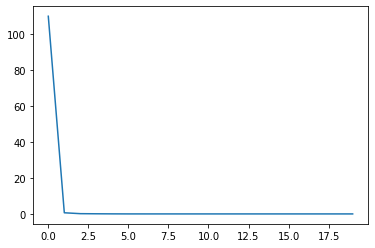

In [10]:
plt.plot(hist.history['loss'])
plt.show()

In [11]:
print('Accuracy:', model.evaluate(x_test, y_test_cat, verbose=0)[1])

Accuracy: 0.925


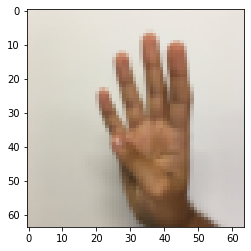

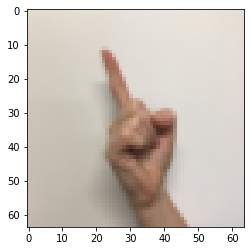

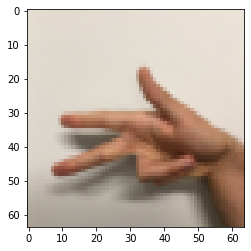

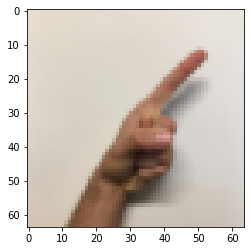

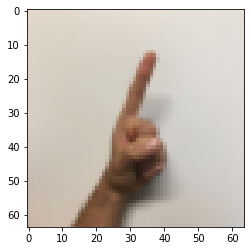

Predictions: [4 1 3 1 1]


In [24]:
u = np.random.randint(0, x_test.shape[0], size=(5,))

y_pre = model.predict(x_test[u])

predictions = np.argmax(y_pre, axis=1)

for i in u:
    plt.imshow(x_test[i].astype(int))
    plt.show()

print('Predictions:', predictions)